In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm

from utils.cuda_cluster import *
from utils.dataset import read_data, factorize_small_cardinality_with_index

import core.config as conf

/home/nyongja/anaconda3/envs/dask/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37563 instead
  http_address["port"], self.http_server.port


In [2]:
from datetime import datetime
import time
import pytz

In [3]:
client

Client Scheduler: tcp://127.0.0.1:38011 Dashboard: http://127.0.0.1:37563/status,Cluster Workers: 1 Cores: 1 Memory: 33.47 GB


In [4]:
NP = 16
# data_path = conf.raw_data_path + '*' # for all dataset
data_path = conf.raw_data_path + 'part-00175'
ori_df = read_data(data_path)

In [5]:
columns = ['tweet_id',
           'engaged_with_user_id',
           'enaging_user_id',
           'tweet_timestamp',
           'like_timestamp',
           'retweet_timestamp',
           'reply_timestamp',
           'retweet_with_comment_timestamp',
           'language',
           'engagee_follows_engager']
df = ori_df[columns]
df.head()

,tweet_id,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,language,engagee_follows_engager
id,,,,,,,,,,
1,C8F345CF8BC7A86E34572072ECFBBEC4,BC99C936FE4C2A1FDB0CD09295CAA53C,411C3FA9B6AB5CA95192D875CDC22823,1612993854,1613048460,0,0,0,B8B04128918BBF54E2E178BFF1ABA833,True
2,C1E31636C343B780BA776E4B73147028,F4ADB8DEADF1980D0B5C2B796C108F78,E764026AB0E38A5C2FF19921D73B6C18,1612886900,0,0,0,0,9FCF19233EAD65EA6E32C2E6DC03A444,False
3,B436C84E80C2430BA9DE41FDF04C73BF,59EBFE44ABE4C5E31528340304F529C3,455134BAAD3EAC4093393EC233FBAEF9,1614019237,0,0,1614019431,0,B0FA488F2911701DD8EC5B1EA5E322D8,True
4,033FFA42C8AD502057AE96C8B4B812BE,DF6A02AB1731A91FA46A2259F398F57B,92D70497B86CAFBA5C51E331084462AD,1612779567,1612780118,0,0,0,1F73BB863A39DB62B4A55B7E558DB1E8,True
5,84F2E902BA3CF3B34B8D056F6F78D488,A656845C3239DB662CFD45D64F2B94F5,DC1C8A9412B9E266A4C3D4CAF6DB06CB,1613822114,0,0,0,0,E7F038DE3EAD397AEC9193686C911677,True


In [6]:
lang_df = df[["tweet_timestamp", "like_timestamp", "retweet_timestamp", "reply_timestamp", "retweet_with_comment_timestamp", "language"]]

In [7]:
kor_df = lang_df[lang_df["language"]=="8729EBF694C3DAF61208A209C2A542C8"]
eng_df = lang_df[lang_df['language']=="488B32D24BD4BB44172EB981C1BCA6FA"]
jap_df = lang_df[lang_df['language']=="E7F038DE3EAD397AEC9193686C911677"]

In [8]:
print(df["language"].compute().unique().head(10))

0    00304D7356D6C64481190D708D8F739C
1    0BB2C843174730BA7D958C98B763A797
2    105008E45831ADE8AF1DB888319F422A
3    10C6C994C2AD434F9D49D4BE9CFBC613
4    159541FA269CA8A9CDB93658CAEC4CA2
5    1F73BB863A39DB62B4A55B7E558DB1E8
6    23686A079CA538645BF6118A1EF51C8B
7    2573A3CF633EBE6932A1E1010D5CD213
8    2F548E5BE0D7F678E72DDE31DFBEF8E7
9    310ECD7D1E42216E3C1B31EFDDFC72A7
Name: language, dtype: object


### tweet id encode

In [9]:
df, tweet_id_index, _ = factorize_small_cardinality_with_index(df, "tweet_id", "tweet_id_encode")
df.head()

,tweet_id,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,language,engagee_follows_engager,tweet_id_encode
0,B8512E8529555FF3D43298DAC0C912CA,8E2F8673DA53511B319665F63511805C,9A9E176A0EA3C721E87136B3EC8B21FA,1613079026,0,0,0,0,488B32D24BD4BB44172EB981C1BCA6FA,True,2031505
1,EC027C079690E3798762DEBAF83D1688,5B52E4BF49F698E355C5CFC3EE40B9A2,F07B5A5598D1341412275D8E33B28640,1612510242,1612545370,0,0,0,2573A3CF633EBE6932A1E1010D5CD213,False,2600656
2,02596E062F15773851C3462D7117E627,457C4B2F6D1C9FA7ADAB57B40AF1262F,52FA2BC4BEA3415DDD4298A64E2FF768,1614019010,1614208933,0,0,0,488B32D24BD4BB44172EB981C1BCA6FA,True,25950
3,FE5D1B5D8F3CC658FB078CE9AC40DEA9,7BEE2D47403F3EC92BC176B738800F28,F91B6F425913952DC54F3BE5D52F49B7,1613014218,0,0,0,0,B8B04128918BBF54E2E178BFF1ABA833,False,2803336
4,E9C6E84F69CE2E0450625F540291D6E4,AC6C2619133E4B470D941A9907C30781,45267FFC2E718410038815E6FAC92F74,1613382844,1613392304,0,0,0,9A78FC330083E72BE0DD1EA92656F3B5,False,2575994


In [10]:
df = df.drop("tweet_id", axis = 1)
df = df.rename(columns = {"index" : "tweet_id_encode"})
df.head()

,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,language,engagee_follows_engager,tweet_id_encode
0,8E2F8673DA53511B319665F63511805C,9A9E176A0EA3C721E87136B3EC8B21FA,1613079026,0,0,0,0,488B32D24BD4BB44172EB981C1BCA6FA,True,2031505
1,5B52E4BF49F698E355C5CFC3EE40B9A2,F07B5A5598D1341412275D8E33B28640,1612510242,1612545370,0,0,0,2573A3CF633EBE6932A1E1010D5CD213,False,2600656
2,457C4B2F6D1C9FA7ADAB57B40AF1262F,52FA2BC4BEA3415DDD4298A64E2FF768,1614019010,1614208933,0,0,0,488B32D24BD4BB44172EB981C1BCA6FA,True,25950
3,7BEE2D47403F3EC92BC176B738800F28,F91B6F425913952DC54F3BE5D52F49B7,1613014218,0,0,0,0,B8B04128918BBF54E2E178BFF1ABA833,False,2803336
4,AC6C2619133E4B470D941A9907C30781,45267FFC2E718410038815E6FAC92F74,1613382844,1613392304,0,0,0,9A78FC330083E72BE0DD1EA92656F3B5,False,2575994


### user id encode

In [11]:
user_a = df["engaged_with_user_id"]
user_b = df["enaging_user_id"]
user_df = dask_cudf.concat([user_a, user_b], axis = 0).unique().to_frame()

In [12]:
user_df = user_df.rename(columns = {0:"user"})
user_df, _, _ = factorize_small_cardinality_with_index(user_df, "user", "user_encode")
user_df.head()

,user,user_encode
0,0113EEB0B0E6E9DA87D4C3010BBD483B,15008
1,01143653E8A3BFC0E6E2ADCB95B3D708,15024
2,01140D882E48C13032A62823C4178B88,15016
3,0114475C0D050F46FC75C85BF42A21E0,15032
4,0113EF07F9A3799AC719738C01A07E25,15009


In [13]:
user_df = user_df.set_index("user")

In [14]:
df = df.merge(user_df, left_on = "engaged_with_user_id", right_index = True, how='left')

In [15]:
df = df.rename(columns = {"user_encode" : "engaged_user_encode"})
df.head()

,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,language,engagee_follows_engager,tweet_id_encode,engaged_user_encode
9216,9E45E57B994F1F68EFCFECB6FF8C0615,15AF34FF6D23494E58E17010E4E6C816,1614182411,1614182607,0,0,0,488B32D24BD4BB44172EB981C1BCA6FA,True,2787196,2170275
9232,F8438EB46A95353C9349C4749BE92460,91D8B36214DFDD9EB2AA4B39004C5B17,1613624519,0,0,0,0,313ECD3A1E5BB07406E4249475C2D6D6,False,1088594,3405094
9224,CA40E9A6205B00F9E872BC9741E9B7E7,83F5B252FEA0EAC04D78654958ED1DDE,1613222955,0,0,0,0,E7F038DE3EAD397AEC9193686C911677,True,2424606,2772844
9240,EFDB575C1AC7BD23D471E7871A952AFD,B6258CDBCE185286B079CF67DDDE5B2E,1613219396,1613219653,0,0,0,488B32D24BD4BB44172EB981C1BCA6FA,False,1482000,3289746
9217,058B2F05F4AF15E979AE7C258139A5DA,F1AFC74C8BC144863BF6CD0DD2B3398F,1614179998,1614187083,0,0,0,B8B04128918BBF54E2E178BFF1ABA833,False,1322938,76292


In [16]:
df = df.merge(user_df, left_on="enaging_user_id", right_index = True, how='left')

In [17]:
df = df.rename(columns = {"user_encode" : "engaging_user_encode"})
df.head()

,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,language,engagee_follows_engager,tweet_id_encode,engaged_user_encode,engaging_user_encode
7104,F1405828D86A8F092A0F0B336E029D33,6DB661168DE72AC8720E58CAF652BF94,1612730586,0,0,0,0,B0FA488F2911701DD8EC5B1EA5E322D8,True,2795514,3308919,1504492
7108,554560F4CF3395FB8801B6DCCFCCB39B,4D76C9FAD0344C6A3183C74435C7F5E2,1613432948,0,0,0,0,B0FA488F2911701DD8EC5B1EA5E322D8,False,2352937,1170065,1063228
7106,8C88EC6202C648008398E985DB44623D,280185F21DB14EE6B34B333204D5C850,1613777096,0,0,0,0,E7F038DE3EAD397AEC9193686C911677,True,1646919,1927377,549103
7110,2F677C6EC8FB9586675A16FB9ABCE2F2,C82670479DA5135BA1045AC397434471,1613355558,1613473524,0,0,0,488B32D24BD4BB44172EB981C1BCA6FA,False,825196,650849,2744007
7120,25F8EEDE3FEF083DF2588E412F6B8082,56E62681CF1DACA74DDD1B970FE6D57B,1613468465,1613468676,0,0,0,E7F038DE3EAD397AEC9193686C911677,True,278418,521362,1192391


In [18]:
df = df.drop(["engaged_with_user_id", "enaging_user_id"], axis = 1)

In [19]:
df = df.repartition(npartitions=NP)
df, = dask.persist(df)

In [20]:
df.head()

,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,language,engagee_follows_engager,tweet_id_encode,engaged_user_encode,engaging_user_encode
17568,1613172895,1613187908,0,0,0,E7F038DE3EAD397AEC9193686C911677,True,2761461,3342006,2800751
17572,1612741180,0,0,1612744331,0,488B32D24BD4BB44172EB981C1BCA6FA,False,2574484,3023369,1600397
17570,1612669326,0,0,0,0,1F73BB863A39DB62B4A55B7E558DB1E8,True,869455,631017,3237562
17574,1612860943,1612917049,0,0,0,488B32D24BD4BB44172EB981C1BCA6FA,True,492000,152107,933384
17584,1613857194,1613861649,0,0,0,23686A079CA538645BF6118A1EF51C8B,True,2138416,3187127,568481


## Anlysis engagement with tweet timestamp (follow)

In [21]:
df["like_timestamp"] = df["like_timestamp"] - df["tweet_timestamp"]
df["retweet_timestamp"] = df["retweet_timestamp"] - df["tweet_timestamp"]
df["reply_timestamp"] = df["reply_timestamp"] - df["tweet_timestamp"]
df["retweet_with_comment_timestamp"] = df["retweet_with_comment_timestamp"] - df["tweet_timestamp"]

In [22]:
follow_df = df[df["engagee_follows_engager"] == True]
no_follow_df = df[df["engagee_follows_engager"] == False]

In [23]:
time_lst = ["5", "60", "240", "480", "1440", "101080", "0"]
follow_values = []
no_follow_values = []

In [24]:
prev_time = 0
for i in time_lst :
    i = int(i)
    if i != 0 :
        like_count = follow_df[(follow_df["like_timestamp"]>=prev_time) & (follow_df["like_timestamp"]<i*60)].count().values.compute()[0]
        retweet_count = follow_df[(follow_df["retweet_timestamp"]>=prev_time) & (follow_df["retweet_timestamp"]<i*60)].count().values.compute()[0]
        reply_count = follow_df[(follow_df["reply_timestamp"]>=prev_time) & (follow_df["reply_timestamp"]<i*60)].count().values.compute()[0]
        comment_count = follow_df[(follow_df["retweet_with_comment_timestamp"]>=prev_time) & (follow_df["retweet_with_comment_timestamp"]<i*60)].count().values.compute()[0]
        all_count = like_count + retweet_count + reply_count + comment_count
    else :
        like_count = follow_df[(follow_df["like_timestamp"]>=prev_time)].count().values.compute()[0]
        retweet_count = follow_df[(follow_df["retweet_timestamp"]>=prev_time)].count().values.compute()[0]
        reply_count = follow_df[(follow_df["reply_timestamp"]>=prev_time) ].count().values.compute()[0]
        comment_count = follow_df[(follow_df["retweet_with_comment_timestamp"]>=prev_time)].count().values.compute()[0]
        all_count = like_count + retweet_count + reply_count + comment_count
    follow_values.append(int(all_count))
    prev_time = i

In [25]:
prev_time = 0
for i in time_lst :
    i = int(i)
    if i!= 0 :
        like_count = no_follow_df[(no_follow_df["like_timestamp"]>=prev_time) & (no_follow_df["like_timestamp"]<int(i)*60)].count().values.compute()[0]
        retweet_count = no_follow_df[(no_follow_df["retweet_timestamp"]>=prev_time) & (no_follow_df["retweet_timestamp"]<int(i)*60)].count().values.compute()[0]
        reply_count = no_follow_df[(no_follow_df["reply_timestamp"]>=prev_time) & (no_follow_df["reply_timestamp"]<int(i)*60)].count().values.compute()[0]
        comment_count = no_follow_df[(no_follow_df["retweet_with_comment_timestamp"]>=prev_time) & (no_follow_df["retweet_with_comment_timestamp"]<int(i)*60)].count().values.compute()[0]
        all_count = like_count + retweet_count + reply_count + comment_count
    else :
        like_count = no_follow_df[(no_follow_df["like_timestamp"]>=prev_time) ].count().values.compute()[0]
        retweet_count = no_follow_df[(no_follow_df["retweet_timestamp"]>=prev_time)].count().values.compute()[0]
        reply_count = no_follow_df[(no_follow_df["reply_timestamp"]>=prev_time) ].count().values.compute()[0]
        comment_count = no_follow_df[(no_follow_df["retweet_with_comment_timestamp"]>=prev_time)].count().values.compute()[0]
        all_count = like_count + retweet_count + reply_count + comment_count
    no_follow_values.append(int(all_count))
    prev_time = i

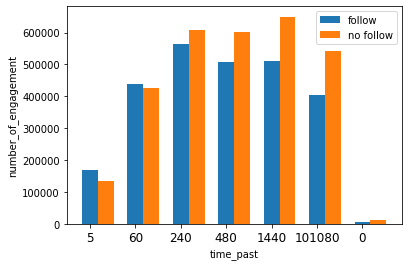

In [26]:
index = np.arange(len(time_lst))
bar_width = 0.35
p1 = plt.bar(index, follow_values, bar_width, label = 'follow')
p2 = plt.bar(index + bar_width, no_follow_values, bar_width, label = 'no_follow')
plt.xlabel('time_past')
plt.ylabel('number_of_engagement')
plt.xticks(index, time_lst, fontsize=12)
plt.legend((p1[0], p2[0]), ('follow', 'no follow'), fontsize=10)
plt.show()

In [27]:
m_follow_values = []
m_no_follow_values = []
for i in range(0, len(time_lst)-1) :
    m_follow_values.append(follow_values[i] / int(time_lst[i]))
    m_no_follow_values.append(no_follow_values[i] / int(time_lst[i]))

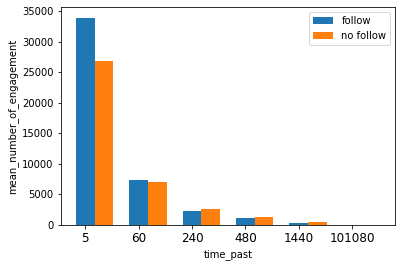

In [28]:
index = np.arange(len(time_lst)-1)
bar_width = 0.35
p1 = plt.bar(index, m_follow_values, bar_width, label = 'follow')
p2 = plt.bar(index + bar_width, m_no_follow_values, bar_width, label = 'no_follow')
plt.xlabel('time_past')
plt.ylabel('mean_number_of_engagement')
plt.xticks(index, time_lst[:-1], fontsize=12)
plt.legend((p1[0], p2[0]), ('follow', 'no follow'), fontsize=10)
plt.show()

## Analysis timestamp with language
The representative language is korean

In [29]:
kor_df.head()

,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,language
id,,,,,,
18,1612713653,0,0,0,0,8729EBF694C3DAF61208A209C2A542C8
50,1612425967,0,0,0,0,8729EBF694C3DAF61208A209C2A542C8
154,1613138699,0,1613138924,0,0,8729EBF694C3DAF61208A209C2A542C8
265,1612769412,0,0,1612769586,0,8729EBF694C3DAF61208A209C2A542C8
323,1612501835,0,0,0,0,8729EBF694C3DAF61208A209C2A542C8


In [30]:
kor_df["like_timestamp"] = kor_df["like_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x) +32400)
kor_df["retweet_timestamp"] = kor_df["retweet_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x) +32400)
kor_df["reply_timestamp"] = kor_df["reply_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x) +32400)
kor_df["retweet_with_comment_timestamp"] = kor_df["retweet_with_comment_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x) +32400)

In [31]:
like_hour = kor_df[kor_df["like_timestamp"] != -1]
retweet_hour = kor_df[kor_df["retweet_timestamp"] != -1]
reply_hour = kor_df[kor_df["reply_timestamp"] != -1]
comment_hour = kor_df[kor_df["retweet_with_comment_timestamp"] != -1]

In [32]:
like_hour = like_hour["like_timestamp"].astype('datetime64[s]')
retweet_hour = retweet_hour["retweet_timestamp"].astype('datetime64[s]')
reply_hour = reply_hour["reply_timestamp"].astype('datetime64[s]')
comment_hour = comment_hour["retweet_with_comment_timestamp"].astype('datetime64[s]')

In [33]:
like_hour = like_hour.dt.hour
retweet_hour = retweet_hour.dt.hour
reply_hour = reply_hour.dt.hour
comment_hour = comment_hour.dt.hour

In [34]:
like_count = like_hour.value_counts().compute().sort_index()
retweet_count = retweet_hour.value_counts().compute().sort_index()
reply_count = reply_hour.value_counts().compute().sort_index()
comment_count = comment_hour.value_counts().compute().sort_index()

In [35]:
count = like_count + retweet_count + reply_count + comment_count

In [36]:
count_lst = [like_count, retweet_count, reply_count, comment_count, count]

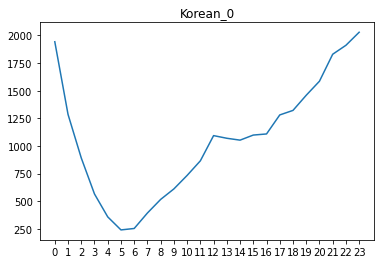

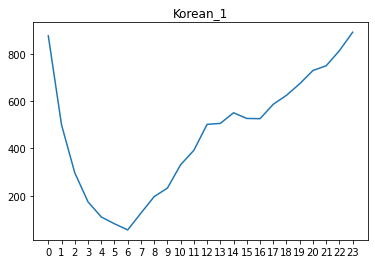

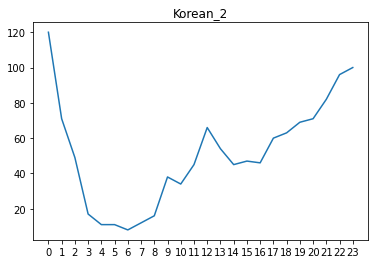

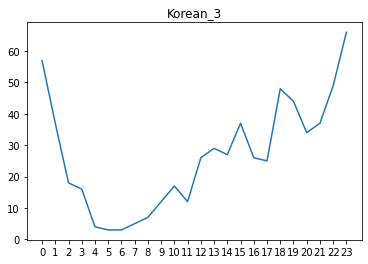

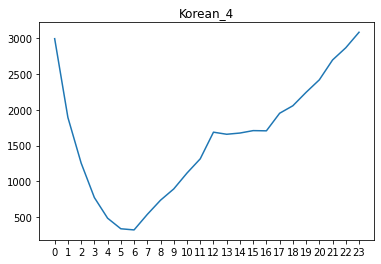

In [37]:
for i in range(len(count_lst)) : 
    plt.title(f"Korean_{i}")
    plt.xticks(range(0,24))
    plt.plot(count_lst[i].to_array())
    plt.show()

The comparision target1 is English!

In [38]:
eng_df["like_timestamp"] = eng_df["like_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x)-21600)
eng_df["retweet_timestamp"] = eng_df["retweet_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x)-21600)
eng_df["reply_timestamp"] = eng_df["reply_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x)-21600)
eng_df["retweet_with_comment_timestamp"] = eng_df["retweet_with_comment_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x)-21600)

In [39]:
eng_like_hour = eng_df[eng_df["like_timestamp"] != -1]
eng_retweet_hour = eng_df[eng_df["retweet_timestamp"] != -1]
eng_reply_hour = eng_df[eng_df["reply_timestamp"] != -1]
eng_comment_hour = eng_df[eng_df["retweet_with_comment_timestamp"] != -1]

In [40]:
eng_like_hour = eng_like_hour["like_timestamp"].astype('datetime64[s]')
eng_retweet_hour = eng_retweet_hour["retweet_timestamp"].astype('datetime64[s]')
eng_reply_hour = eng_reply_hour["reply_timestamp"].astype('datetime64[s]')
eng_comment_hour = eng_comment_hour["retweet_with_comment_timestamp"].astype('datetime64[s]')

In [41]:
eng_like_hour = eng_like_hour.dt.hour
eng_retweet_hour = eng_retweet_hour.dt.hour
eng_reply_hour = eng_reply_hour.dt.hour
eng_comment_hour = eng_comment_hour.dt.hour

In [42]:
eng_like_count = eng_like_hour.value_counts().compute().sort_index()
eng_retweet_count = eng_retweet_hour.value_counts().compute().sort_index()
eng_reply_count = eng_reply_hour.value_counts().compute().sort_index()
eng_comment_count = eng_comment_hour.value_counts().compute().sort_index()

In [43]:
eng_count = eng_like_count + eng_retweet_count + eng_reply_count + eng_comment_count

In [44]:
eng_count_lst = [eng_like_count, eng_retweet_count, eng_reply_count, eng_comment_count, eng_count]

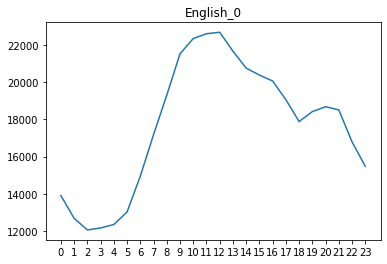

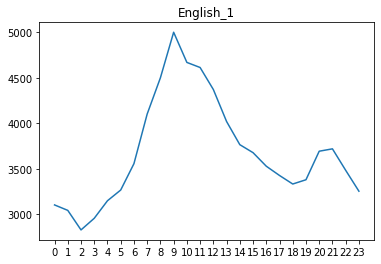

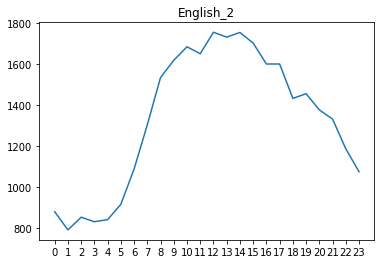

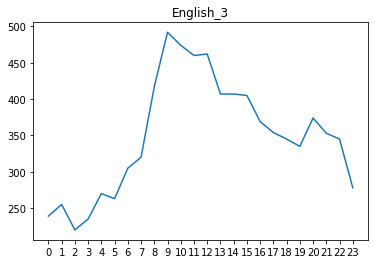

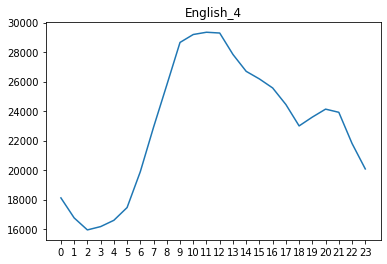

In [45]:
for i in range(len(eng_count_lst)) : 
    plt.title(f"English_{i}")
    plt.xticks(range(0,24))
    plt.plot(eng_count_lst[i].to_array())
    plt.show()

The comparision target2 is Japanese!

In [46]:
jap_df["like_timestamp"] = jap_df["like_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x) +32400)
jap_df["retweet_timestamp"] = jap_df["retweet_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x) +32400)
jap_df["reply_timestamp"] = jap_df["reply_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x) +32400)
jap_df["retweet_with_comment_timestamp"] = jap_df["retweet_with_comment_timestamp"].compute().applymap(lambda x : -1 if int(x) == 0 else int(x) +32400)

In [47]:
jap_like_hour = jap_df[jap_df["like_timestamp"] != -1]
jap_retweet_hour = jap_df[jap_df["retweet_timestamp"] != -1]
jap_reply_hour = jap_df[jap_df["reply_timestamp"] != -1]
jap_comment_hour = jap_df[jap_df["retweet_with_comment_timestamp"] != -1]

In [48]:
jap_like_hour = jap_like_hour["like_timestamp"].astype('datetime64[s]')
jap_retweet_hour = jap_retweet_hour["retweet_timestamp"].astype('datetime64[s]')
jap_reply_hour = jap_reply_hour["reply_timestamp"].astype('datetime64[s]')
jap_comment_hour = jap_comment_hour["retweet_with_comment_timestamp"].astype('datetime64[s]')

In [49]:
jap_like_hour = jap_like_hour.dt.hour
jap_retweet_hour = jap_retweet_hour.dt.hour
jap_reply_hour = jap_reply_hour.dt.hour
jap_comment_hour = jap_comment_hour.dt.hour

In [54]:
jap_like_count = jap_like_hour.value_counts().compute().sort_index()
jap_retweet_count = jap_retweet_hour.value_counts().compute().sort_index()
jap_reply_count = jap_reply_hour.value_counts().compute().sort_index()
jap_comment_count = jap_comment_hour.value_counts().compute().sort_index()

In [60]:
jap_count = jap_like_count + jap_retweet_count + jap_reply_count + jap_comment_count
jap_count_lst = [jap_like_count, jap_retweet_count, jap_reply_count, jap_comment_count, jap_count]

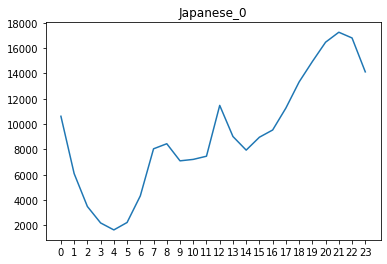

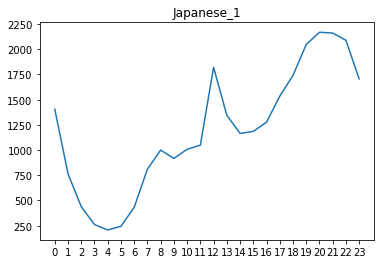

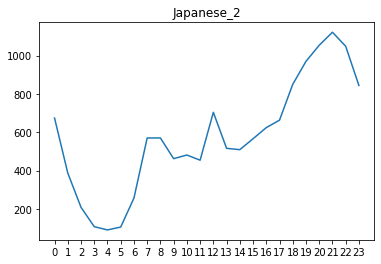

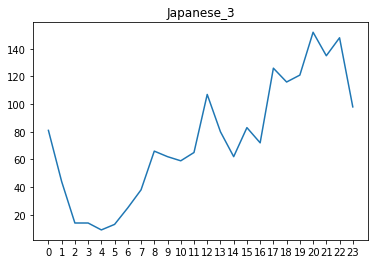

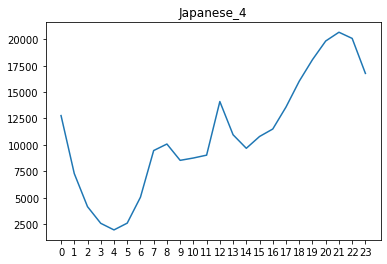

In [61]:
for i in range(len(jap_count_lst)) : 
    plt.title(f"Japanese_{i}")
    plt.xticks(range(0,24))
    plt.plot(jap_count_lst[i].to_array())
    plt.show()